# COVID Data: Correlations with Distress Levels

Run the following cell:

In [1]:
import pandas as pd
import os
import plotly.io as pio
pio.renderers.default= 'iframe'
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

Run the following line in conda Powershell prompt:

Visit https://healthpolicy.ucla.edu/chis/data/Pages/public-use-data.aspx and create an account. Click on the data files link, and scroll to the bottom of the page. Download the adult SPSS file from the 2020 CHIS column.

Get the absolute directory and paste it between the quotation marks.

(more info: https://stackoverflow.com/questions/5265702/how-to-get-full-path-of-a-file)

Run the following code. If it doesn't run, make sure you downloaded the SPSS file, unzipped the file, obtained the file's absolute directory, and pasted it correctly.

In [2]:
# dataframe from https://healthpolicy.ucla.edu/chis/data/Pages/public-use-data.aspx

adult_df = pd.read_spss(r"C:\Users\ryvo1\Downloads\ADULT_SPSS_PUF_2020\SPSS\ADULT.sav")
adult_df

,AA5C,AA5G,AB1,AB112,AB17,AB18,AB22V2,AB23_P1,AB24,AB25,...,USUAL_TP,VOTE_ENG2,VOTE_RSNNO,WEIGHK_P,WGHTK_P,WGHTP_P,WHOBMI,WORK2,WRKST_P1,YRUS_P1
0,INAPPLICABLE,INAPPLICABLE,GOOD,INAPPLICABLE,NO,INAPPLICABLE,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,DOC OFFICE/HMO/KAISER,SOMETIMES ENGAGED,VOTING DOESN’T MAKE A DIFFERENCE,71.67,71.67,158.0,23.0 - 27.49 (INCREASED RISK),NONE,FULL-TIME EMPLOYMENT (21+ HRS/WEEK),INAPPLICABLE
1,INAPPLICABLE,INAPPLICABLE,VERY GOOD,INAPPLICABLE,NO,INAPPLICABLE,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,DOC OFFICE/HMO/KAISER,SOMETIMES ENGAGED,TOO BUSY OR FORGOT,72.57,72.57,160.0,23.0 - 27.49 (INCREASED RISK),INAPPLICABLE,"UNEMPLOYED, NOT LOOKING FOR WORK",INAPPLICABLE
2,INAPPLICABLE,INAPPLICABLE,VERY GOOD,INAPPLICABLE,NO,INAPPLICABLE,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,DOC OFFICE/HMO/KAISER,ALWAYS ENGAGED,INAPPLICABLE,77.11,77.11,170.0,27.5 OR HIGHER (HIGHER HIGH RISK),INAPPLICABLE,"UNEMPLOYED, NOT LOOKING FOR WORK",15-19 YEARS
3,INAPPLICABLE,INAPPLICABLE,GOOD,INAPPLICABLE,YES,NO,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,DOC OFFICE/HMO/KAISER,ALWAYS ENGAGED,INAPPLICABLE,49.90,49.90,110.0,18.5 - 22.99 (ACCEPTABLE RISK),INAPPLICABLE,"UNEMPLOYED, NOT LOOKING FOR WORK",INAPPLICABLE
4,INAPPLICABLE,YES,FAIR,INAPPLICABLE,NO,INAPPLICABLE,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,DOC OFFICE/HMO/KAISER,INAPPLICABLE,INAPPLICABLE,104.33,104.33,230.0,27.5 OR HIGHER (HIGHER HIGH RISK),MODERATE,FULL-TIME EMPLOYMENT (21+ HRS/WEEK),15-19 YEARS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21944,INAPPLICABLE,INAPPLICABLE,VERY GOOD,INAPPLICABLE,NO,INAPPLICABLE,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,"COMMUN/GOV CLIN, COMMUN HOSP",SOMETIMES ENGAGED,DON’T KNOW ENOUGH ABOUT CANDIDATES/ISSUES,65.77,65.77,145.0,23.0 - 27.49 (INCREASED RISK),MODERATE,FULL-TIME EMPLOYMENT (21+ HRS/WEEK),INAPPLICABLE
21945,INAPPLICABLE,INAPPLICABLE,EXCELLENT,INAPPLICABLE,NO,INAPPLICABLE,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,DOC OFFICE/HMO/KAISER,ALWAYS ENGAGED,INAPPLICABLE,61.69,61.69,136.0,23.0 - 27.49 (INCREASED RISK),INAPPLICABLE,FULL-TIME EMPLOYMENT (21+ HRS/WEEK),15-19 YEARS
21946,INAPPLICABLE,INAPPLICABLE,VERY GOOD,INAPPLICABLE,YES,YES,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,DOC OFFICE/HMO/KAISER,ALWAYS ENGAGED,INAPPLICABLE,88.45,88.45,195.0,27.5 OR HIGHER (HIGHER HIGH RISK),INAPPLICABLE,FULL-TIME EMPLOYMENT (21+ HRS/WEEK),INAPPLICABLE
21947,INAPPLICABLE,INAPPLICABLE,GOOD,INAPPLICABLE,NO,INAPPLICABLE,NO,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,...,"COMMUN/GOV CLIN, COMMUN HOSP",NEVER ENGAGED,DON'T LIKE OR CARE ABOUT POLITICS,65.77,65.77,145.0,18.5 - 22.99 (ACCEPTABLE RISK),INAPPLICABLE,"UNEMPLOYED, NOT LOOKING FOR WORK",INAPPLICABLE


What do these column names mean?

Download the adult SAS file from the 2020 CHIS column. Unzip it and open ADULT_LABEL.SAS.

Open the three label files in jupyterlab (or at least that's what I'm using), and we see the data categories associated with the labels.

#### ADULT_LABEL.SAS should look like this:

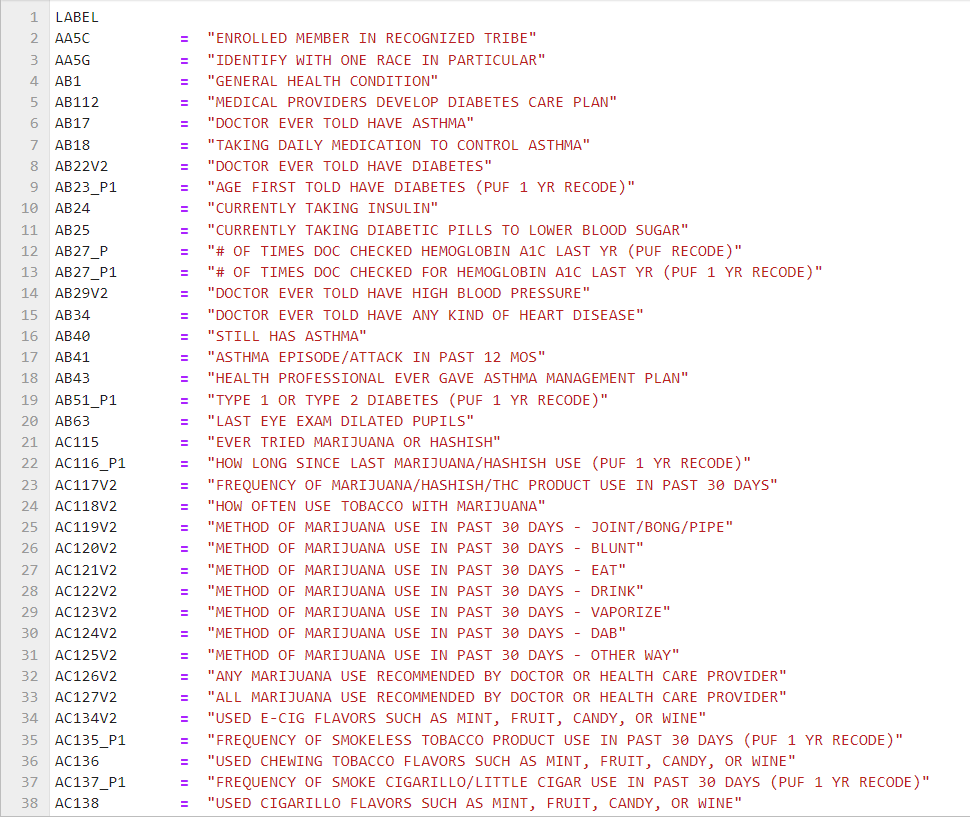

### Representing the data

We want to find correlations between one of these columns in adult_df and the DISTRESS levels of a patient (given by 'DISTRESS', which is another column in adult_df).

For example, for categorical variables like "CV1" (Ever had or thought had COVID-19, where respondents answer yes/no), we start by getting the proportions of respondents who said "YES" to possessing the COVID-related trait to all respondents. Then, we aggregate each patient's answer with their distress levels. Distress levels are reported by patient on a scale of 0-24. 

Informally, below is a neat plotly histogram which shows the counts of COVID havers per distress level. 

In [3]:
# CV1           =  "EVER HAD OR THOUGHT HAD COVID-19"
# DISTRESS      =  "SERIOUS PSYCHOLOGICAL DISTRESS"

fig = px.histogram(adult_df, 
x = "CV1", 
color = "DISTRESS", 
width = 600,
height = 600)

fig.show()

We want to see how 'DISTRESS' is affected by possessing the COVID related trait. Here is another histogram, showing how CV1 affects distress levels.

In [4]:
fig = px.histogram(adult_df, 
x = "DISTRESS", 
color = "CV1", 
width = 600,
height = 600,
marginal = "box", # or violin, rug
hover_data = adult_df.columns)

fig.update_layout(barmode='overlay')

fig.show()

People who respond "YES" to CV1 (so they do have/ think they've had COVID) tend to have higher DISTRESS levels, as the box-and-whisker shows that their median DISTRESS levels and interquartile range are placed higher than those for the people who responded "NO" to CV1.

##### Now, let's make a more specific model of how distress levels change for each instance of CV1 (thinks they had COVID, doesn't think they had COVID):

In [5]:
work = adult_df.groupby(['DISTRESS', 'CV1']).count()
work[['AA5C']]

AA5C
DISTRESS      CV1      
0.0           NO   4161
              YES   324
1.0           NO   2504
              YES   233
2.0           NO   2798
              YES   264
3.0           NO   2125
              YES   231
4.0           NO   1733
              YES   212
5.0           NO   1238
              YES   202
6.0           NO   1148
              YES   161
7.0           NO    789
              YES   150
8.0           NO    657
              YES   124
9.0           NO    532
              YES   100
10.0          NO    426
              YES    78
11.0          NO    325
              YES    64
12.0          NO    327
              YES    62
13.0          NO    209
              YES    39
14.0          NO    166
              YES    26
15.0          NO    110
              YES    25
16.0          NO     84
              YES    19
17.0          NO     70
              YES    14
18.0          NO     68
              YES    18
19.0          NO     33
              YES     7
20.0          NO     16
              YES     4
21.0          NO     23
              YES     6
22.0          NO      2
              YES     2
23.0          NO      5
              YES     2
24.0          NO     23
              YES     5
PROXY SKIPPED NO      4
              YES     1

In [6]:
work.reset_index()
lol = work.groupby(['DISTRESS']).sum()
lol[['AA5C']]

wow = work / lol
wow[['AA5C']]

# proportions:

AA5C
DISTRESS      CV1          
0.0           NO   0.927759
              YES  0.072241
1.0           NO   0.914870
              YES  0.085130
2.0           NO   0.913782
              YES  0.086218
3.0           NO   0.901952
              YES  0.098048
4.0           NO   0.891003
              YES  0.108997
5.0           NO   0.859722
              YES  0.140278
6.0           NO   0.877005
              YES  0.122995
7.0           NO   0.840256
              YES  0.159744
8.0           NO   0.841229
              YES  0.158771
9.0           NO   0.841772
              YES  0.158228
10.0          NO   0.845238
              YES  0.154762
11.0          NO   0.835476
              YES  0.164524
12.0          NO   0.840617
              YES  0.159383
13.0          NO   0.842742
              YES  0.157258
14.0          NO   0.864583
              YES  0.135417
15.0          NO   0.814815
              YES  0.185185
16.0          NO   0.815534
              YES  0.184466
17.0          NO   0.833333
              YES  0.166667
18.0          NO   0.790698
              YES  0.209302
19.0          NO   0.825000
              YES  0.175000
20.0          NO   0.800000
              YES  0.200000
21.0          NO   0.793103
              YES  0.206897
22.0          NO   0.500000
              YES  0.500000
23.0          NO   0.714286
              YES  0.285714
24.0          NO   0.821429
              YES  0.178571
PROXY SKIPPED NO   0.800000
              YES  0.200000

# Variables to measure:

# Linear Regression

using Linear Regression from scikit learn.

WANT: X = 'DISTRESS' values (0, 1, ..., 24), Y = proportion of 'YES' for a variable (like CV1) to all respondents per distress level.

### Getting 'DISTRESS' values:

In [7]:
woah = adult_df["DISTRESS"].sort_values()
sick = woah.unique()
sick

# Prepares 'DISTRESS' to be graphed later
bang = sick
bang = bang.reshape(-1,1)

### Getting values for comparison (Doing 'CV1' for example):

First, get total values per distress value ('YES' + 'NO'):

In [8]:
work = adult_df.groupby(['DISTRESS', 'CV1']).count()
totals = work.groupby(['DISTRESS']).sum()

Now, get each 'YES' count per 'DISTRESS' (324, 233, ...):

In [9]:
work = adult_df.groupby(['DISTRESS', 'CV1']).count()
totals = work.groupby(['DISTRESS']).sum()
totals[['AA5C']]

,AA5C
DISTRESS,
0.0,4485
1.0,2737
2.0,3062
3.0,2356
4.0,1945
5.0,1440
6.0,1309
7.0,939
8.0,781


In [10]:
props = work / totals
props = props.reset_index()
finalprops = props[props['CV1'] == "YES"]['AA5C']
finalprops

1     0.072241
3     0.085130
5     0.086218
7     0.098048
9     0.108997
11    0.140278
13    0.122995
15    0.159744
17    0.158771
19    0.158228
21    0.154762
23    0.164524
25    0.159383
27    0.157258
29    0.135417
31    0.185185
33    0.184466
35    0.166667
37    0.209302
39    0.175000
41    0.200000
43    0.206897
45    0.500000
47    0.285714
49    0.178571
51    0.200000
Name: AA5C, dtype: float64

##### Linear Regression part:

In [11]:
bing = finalprops.values
bing = bing.reshape(-1,1)
bang = sick
bang = bang.reshape(-1,1)

In [12]:
bing

array([[0.0722408 ],
       [0.0851297 ],
       [0.08621816],
       [0.09804754],
       [0.10899743],
       [0.14027778],
       [0.12299465],
       [0.15974441],
       [0.15877081],
       [0.15822785],
       [0.1547619 ],
       [0.16452442],
       [0.15938303],
       [0.15725806],
       [0.13541667],
       [0.18518519],
       [0.18446602],
       [0.16666667],
       [0.20930233],
       [0.175     ],
       [0.2       ],
       [0.20689655],
       [0.5       ],
       [0.28571429],
       [0.17857143],
       [0.2       ]])

In [13]:
bang

[[0.0], [1.0], [2.0], [3.0], [4.0], ..., [21.0], [22.0], [23.0], [24.0], ['PROXY SKIPPED']]
Length: 26
Categories (26, object): [0.0, 1.0, 2.0, 3.0, ..., 22.0, 23.0, 24.0, 'PROXY SKIPPED']

We don't really care about 'PROXY SKIPPED' and its value bing[25], so we'll remove them both to work with the data:

In [14]:
X = np.delete(bing, 25)
Y = np.delete(bang, 25)

In [15]:
X

array([0.0722408 , 0.0851297 , 0.08621816, 0.09804754, 0.10899743,
       0.14027778, 0.12299465, 0.15974441, 0.15877081, 0.15822785,
       0.1547619 , 0.16452442, 0.15938303, 0.15725806, 0.13541667,
       0.18518519, 0.18446602, 0.16666667, 0.20930233, 0.175     ,
       0.2       , 0.20689655, 0.5       , 0.28571429, 0.17857143])

In [16]:
Y

array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
       13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0,
       24.0], dtype=object)

Finally, we gotta shape it so it works with LinearRegression().fit:

In [17]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

Now it is ready.

In [18]:
model = LinearRegression().fit(Y, X)

In [19]:
model.coef_

array([[0.00789314]])

In [20]:
x_pred = model.predict(Y)

In [21]:
print('slope:', model.coef_)
print('intercept:', model.intercept_)

slope: [[0.00789314]]
intercept: [0.0754341]


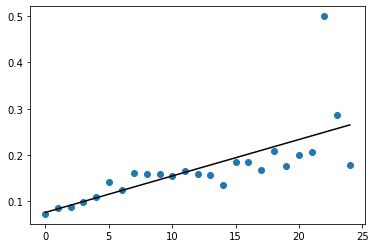

In [22]:
plt.scatter(Y, X)
plt.plot(Y, x_pred, color='black')
plt.show()

Now, we do the same for the rest of our variables:

### CV7_1

In [23]:
a = adult_df.groupby(['DISTRESS', 'CV7_1']).count()
atotals = a.groupby(['DISTRESS']).sum()
aprops = a / atotals
aprops = aprops.reset_index()
aprops
afinalprops = aprops[aprops['CV7_1'] == "YES"]['AA5C']
afinalprops
bing1 = afinalprops.values
bing1 = bing1.reshape(-1,1)
X1 = np.delete(bing1, 25)
X1 = X1.reshape(-1,1)
model1 = LinearRegression().fit(Y, X1)
model1.coef_
x1_pred = model1.predict(Y)
print('slope:', model1.coef_)
print('intercept:', model1.intercept_)

slope: [[0.00841025]]
intercept: [0.03548043]


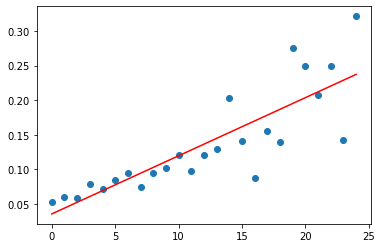

In [24]:
plt.scatter(Y, X1)
plt.plot(Y, x1_pred, color='red')
plt.show()

### CV7_2

In [25]:
b = adult_df.groupby(['DISTRESS', 'CV7_2']).count()
btotals = b.groupby(['DISTRESS']).sum()
bprops = b / btotals
bprops = bprops.reset_index()
bprops
bfinalprops = bprops[bprops['CV7_2'] == "YES"]['AA5C']
bfinalprops
bing2 = bfinalprops.values
bing2 = bing2.reshape(-1,1)
X2 = np.delete(bing2, 25)
X2 = X2.reshape(-1,1)
model2 = LinearRegression().fit(Y, X2)
model2.coef_
x2_pred = model2.predict(Y)
print('slope:', model2.coef_)
print('intercept:', model2.intercept_)

slope: [[0.00948629]]
intercept: [0.11119345]


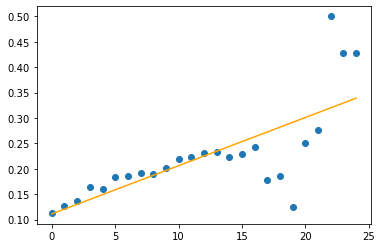

In [26]:
plt.scatter(Y, X2)
plt.plot(Y, x2_pred, color='orange')
plt.show()

### CV7_3

In [27]:
c = adult_df.groupby(['DISTRESS', 'CV7_3']).count()
ctotals = c.groupby(['DISTRESS']).sum()
cprops = c / ctotals
cprops = cprops.reset_index()
cprops
cfinalprops = cprops[cprops['CV7_3'] == "YES"]['AA5C']
cfinalprops
bing3 = cfinalprops.values
bing3 = bing3.reshape(-1,1)
X3 = np.delete(bing3, 25)
X3 = X3.reshape(-1,1)
model3 = LinearRegression().fit(Y, X3)
model3.coef_
x3_pred = model3.predict(Y)
print('slope:', model3.coef_)
print('intercept:', model3.intercept_)

slope: [[0.00474906]]
intercept: [0.22433384]


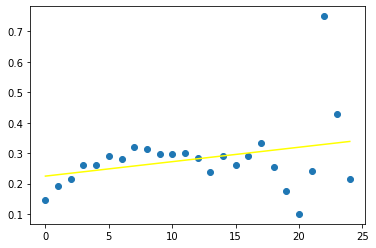

In [28]:
plt.scatter(Y, X3)
plt.plot(Y, x3_pred, color='yellow')
plt.show()

### CV7_4

In [29]:
d = adult_df.groupby(['DISTRESS', 'CV7_4']).count()
dtotals = d.groupby(['DISTRESS']).sum()
dprops = d / dtotals
dprops = dprops.reset_index()
dprops
dfinalprops = dprops[dprops['CV7_4'] == "YES"]['AA5C']
dfinalprops
bing4 = dfinalprops.values
bing4 = bing4.reshape(-1,1)
X4 = np.delete(bing4, 25)
X4 = X4.reshape(-1,1)
model4 = LinearRegression().fit(Y, X4)
model4.coef_
x4_pred = model4.predict(Y)
print('slope:', model4.coef_)
print('intercept:', model4.intercept_)

slope: [[0.00274451]]
intercept: [0.14540029]


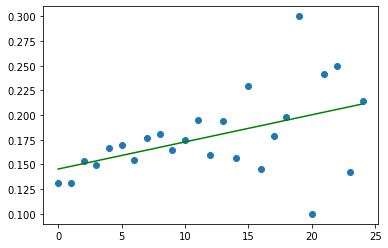

In [30]:
plt.scatter(Y, X4)
plt.plot(Y, x4_pred, color='green')
plt.show()

### CV7_5

In [31]:
e = adult_df.groupby(['DISTRESS', 'CV7_5']).count()
etotals = e.groupby(['DISTRESS']).sum()
eprops = e / etotals
eprops = eprops.reset_index()
eprops
efinalprops = eprops[eprops['CV7_5'] == "YES"]['AA5C']
efinalprops
bing5 = efinalprops.values
bing5 = bing5.reshape(-1,1)
X5 = np.delete(bing5, 25)
X5 = X5.reshape(-1,1)
model5 = LinearRegression().fit(Y, X5)
model5.coef_
x5_pred = model5.predict(Y)
print('slope:', model5.coef_)
print('intercept:', model5.intercept_)

slope: [[0.00045818]]
intercept: [0.02465135]


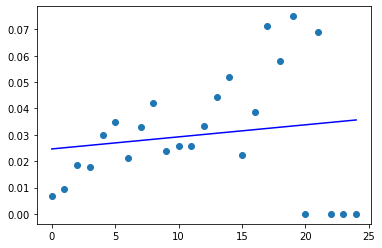

In [32]:
plt.scatter(Y, X5)
plt.plot(Y, x5_pred, color='blue')
plt.show()

### CV7_6

In [33]:
f = adult_df.groupby(['DISTRESS', 'CV7_6']).count()
ftotals = f.groupby(['DISTRESS']).sum()
fprops = f / ftotals
fprops = fprops.reset_index()
fprops
ffinalprops = fprops[fprops['CV7_6'] == "YES"]['AA5C']
ffinalprops
bing6 = ffinalprops.values
bing6 = bing6.reshape(-1,1)
X6 = np.delete(bing6, 25)
X6 = X6.reshape(-1,1)
model6 = LinearRegression().fit(Y, X6)
model6.coef_
x6_pred = model6.predict(Y)
print('slope:', model6.coef_)
print('intercept:', model6.intercept_)

slope: [[0.00944908]]
intercept: [0.01617633]


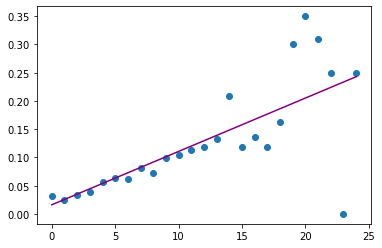

In [34]:
plt.scatter(Y, X6)
plt.plot(Y, x6_pred, color='purple')
plt.show()

### CV7_7

In [35]:
g = adult_df.groupby(['DISTRESS', 'CV7_7']).count()
gtotals = g.groupby(['DISTRESS']).sum()
gprops = g / gtotals
gprops = gprops.reset_index()
gprops
gfinalprops = gprops[gprops['CV7_7'] == "YES"]['AA5C']
gfinalprops
bing7 = gfinalprops.values
bing7 = bing7.reshape(-1,1)
X7 = np.delete(bing7, 25)
X7 = X7.reshape(-1,1)
model7 = LinearRegression().fit(Y, X7)
model7.coef_
x7_pred = model7.predict(Y)
print('slope:', model7.coef_)
print('intercept:', model7.intercept_)

slope: [[0.01521413]]
intercept: [-0.01092046]


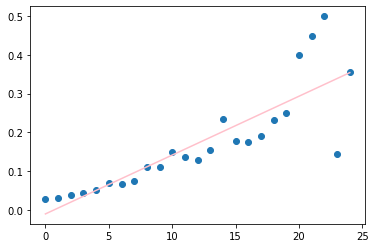

In [36]:
plt.scatter(Y, X7)
plt.plot(Y, x7_pred, color='pink')
plt.show()

### CV7_8

In [37]:
h = adult_df.groupby(['DISTRESS', 'CV7_8']).count()
htotals = h.groupby(['DISTRESS']).sum()
hprops = h / htotals
hprops = hprops.reset_index()
hprops
hfinalprops = hprops[hprops['CV7_8'] == "YES"]['AA5C']
hfinalprops
bing8 = hfinalprops.values
bing8 = bing8.reshape(-1,1)
X8 = np.delete(bing8, 25)
X8 = X8.reshape(-1,1)
model8 = LinearRegression().fit(Y, X8)
model8.coef_
x8_pred = model8.predict(Y)
print('slope:', model8.coef_)
print('intercept:', model8.intercept_)

slope: [[0.00415819]]
intercept: [-0.00908834]


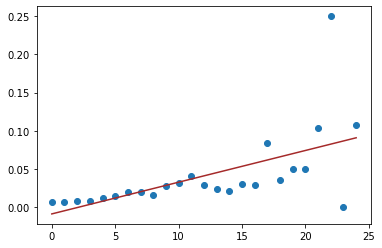

In [38]:
plt.scatter(Y, X8)
plt.plot(Y, x8_pred, color='brown')
plt.show()

### CV7_9

In [39]:
i = adult_df.groupby(['DISTRESS', 'CV7_9']).count()
itotals = i.groupby(['DISTRESS']).sum()
iprops = i / itotals
iprops = iprops.reset_index()
iprops
ifinalprops = iprops[iprops['CV7_9'] == "YES"]['AA5C']
ifinalprops
bing9 = ifinalprops.values
bing9 = bing9.reshape(-1,1)
X9 = np.delete(bing9, 25)
X9 = X9.reshape(-1,1)
model9 = LinearRegression().fit(Y, X9)
model9.coef_
x9_pred = model9.predict(Y)
print('slope:', model9.coef_)
print('intercept:', model9.intercept_)

slope: [[0.00142768]]
intercept: [0.01781202]


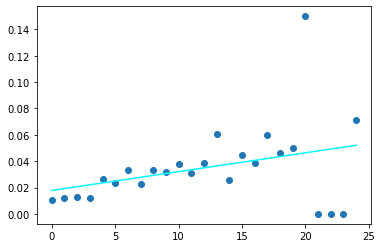

In [40]:
plt.scatter(Y, X9)
plt.plot(Y, x9_pred, color='cyan')
plt.show()

### CV7_10        =  "EVER EXPERIENCED DUE TO COVID-19 OUTBREAK: NONE OF THESE"

In [41]:
j = adult_df.groupby(['DISTRESS', 'CV7_10']).count()
jtotals = j.groupby(['DISTRESS']).sum()
jprops = j / jtotals
jprops = jprops.reset_index()
jprops
jfinalprops = jprops[jprops['CV7_10'] == "YES"]['AA5C']
jfinalprops
bing10 = jfinalprops.values
bing10 = bing10.reshape(-1,1)
X10 = np.delete(bing10, 25)
X10 = X10.reshape(-1,1)
model10 = LinearRegression().fit(Y, X10)
model10.coef_
x10_pred = model10.predict(Y)
print('slope:', model10.coef_)
print('intercept:', model10.intercept_)

slope: [[-0.01409242]]
intercept: [0.47161348]


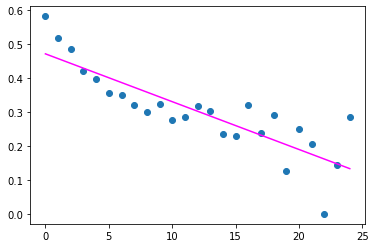

In [42]:
plt.scatter(Y, X10)
plt.plot(Y, x10_pred, color='magenta')
plt.show()

### CV7_11        =  "EVER EXPERIENCED DUE TO COVID-19 OUTBREAK: INCREASED MENTAL HEALTH CHALLENGES"

In [43]:
k = adult_df.groupby(['DISTRESS', 'CV7_11']).count()
ktotals = k.groupby(['DISTRESS']).sum()
kprops = k / ktotals
kprops = kprops.reset_index()
kprops
kfinalprops = kprops[kprops['CV7_11'] == "YES"]['AA5C']
kfinalprops
bing11 = kfinalprops.values
bing11 = bing11.reshape(-1,1)
X11 = np.delete(bing11, 25)
X11 = X11.reshape(-1,1)
model11 = LinearRegression().fit(Y, X11)
model11.coef_
x11_pred = model11.predict(Y)
print('slope:', model11.coef_)
print('intercept:', model11.intercept_)

slope: [[0.00034318]]
intercept: [0.00788963]


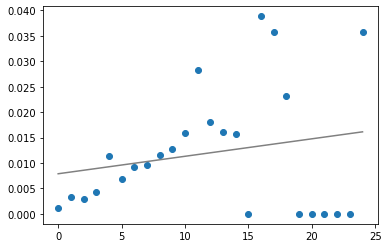

In [44]:
plt.scatter(Y, X11)
plt.plot(Y, x11_pred, color='gray')
plt.show()

### CV8_1         =  "INCREASE IN HH DURING COVID STAY-AT-HOME ORDER: INTERPERSONAL CONFLICT"

In [45]:
l = adult_df.groupby(['DISTRESS', 'CV8_1']).count()
ltotals = l.groupby(['DISTRESS']).sum()
lprops = l / ltotals
lprops = lprops.reset_index()
lprops
lfinalprops = lprops[lprops['CV8_1'] == "YES"]['AA5C']
lfinalprops
bing12 = lfinalprops.values
bing12 = bing12.reshape(-1,1)
X12 = np.delete(bing12, 25)
X12 = X12.reshape(-1,1)
model12 = LinearRegression().fit(Y, X12)
model12.coef_
x12_pred = model12.predict(Y)
print('slope:', model12.coef_)
print('intercept:', model12.intercept_)

slope: [[0.00934817]]
intercept: [0.1003169]


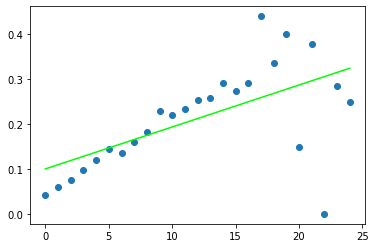

In [46]:
plt.scatter(Y, X12)
plt.plot(Y, x12_pred, color='lime')
plt.show()

### CV8_2         =  "INCREASE IN HH DURING COVID STAY-AT-HOME ORDER: SNAPPING/YELLING"

In [47]:
m = adult_df.groupby(['DISTRESS', 'CV8_2']).count()
mtotals = m.groupby(['DISTRESS']).sum()
mprops = m / mtotals
mprops = mprops.reset_index()
mprops
mfinalprops = mprops[mprops['CV8_2'] == "YES"]['AA5C']
mfinalprops
bing13 = mfinalprops.values
bing13 = bing13.reshape(-1,1)
X13 = np.delete(bing13, 25)
X13 = X13.reshape(-1,1)
model13 = LinearRegression().fit(Y, X13)
model13.coef_
x13_pred = model13.predict(Y)
print('slope:', model13.coef_)
print('intercept:', model13.intercept_)

slope: [[0.01522962]]
intercept: [0.07062213]


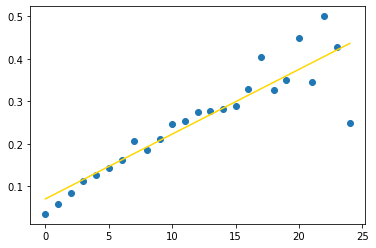

In [48]:
plt.scatter(Y, X13)
plt.plot(Y, x13_pred, color='gold')
plt.show()

### CV8_4         =  "INCREASE IN HH DURING COVID STAY-AT-HOME ORDER: NONE OF THESE"

In [49]:
n = adult_df.groupby(['DISTRESS', 'CV8_4']).count()
ntotals = n.groupby(['DISTRESS']).sum()
nprops = n / ntotals
nprops = nprops.reset_index()
nprops
nfinalprops = nprops[nprops['CV8_4'] == "YES"]['AA5C']
nfinalprops
bing14 = nfinalprops.values
bing14 = bing14.reshape(-1,1)
X14 = np.delete(bing14, 25)
X14 = X14.reshape(-1,1)
model14 = LinearRegression().fit(Y, X14)
model14.coef_
x14_pred = model14.predict(Y)
print('slope:', model14.coef_)
print('intercept:', model14.intercept_)

slope: [[-0.0140446]]
intercept: [0.67883064]


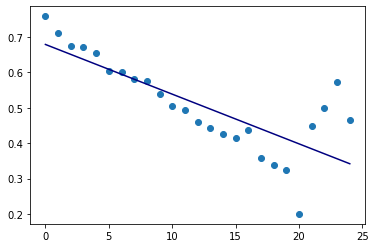

In [50]:
plt.scatter(Y, X14)
plt.plot(Y, x14_pred, color='navy')
plt.show()

### CV9           =  "WOULD GET COVID-19 VACCINE IF AVAILABLE"

In [51]:
o = adult_df.groupby(['DISTRESS', 'CV9']).count()
ototals = o.groupby(['DISTRESS']).sum()
oprops = o / ototals
oprops = oprops.reset_index()
oprops
ofinalprops = oprops[oprops['CV9'] == "YES"]['AA5C']
ofinalprops
bing15 = ofinalprops.values
bing15 = bing15.reshape(-1,1)
X15 = np.delete(bing15, 25)
X15 = X15.reshape(-1,1)
model15 = LinearRegression().fit(Y, X15)
model15.coef_
x15_pred = model15.predict(Y)
print('slope:', model15.coef_)
print('intercept:', model15.intercept_)

slope: [[-0.00263771]]
intercept: [0.82929893]


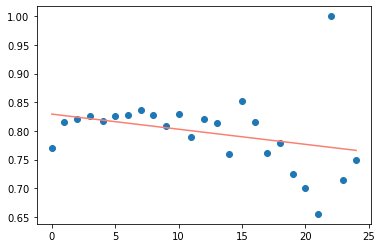

In [52]:
plt.scatter(Y, X15)
plt.plot(Y, x15_pred, color='salmon')
plt.show()

In [53]:
print('slope1:', model1.coef_)
print('slope2:', model2.coef_)
print('slope3:', model3.coef_)
print('slope4:', model4.coef_)
print('slope5:', model5.coef_)
print('slope6:', model6.coef_)
print('slope7:', model7.coef_)
print('slope8:', model8.coef_)
print('slope9:', model9.coef_)
print('slope10:', model10.coef_)
print('slope11:', model11.coef_)
print('slope12:', model12.coef_)
print('slope13:', model13.coef_)
print('slope14:', model14.coef_)
print('slope15:', model15.coef_)

slope1: [[0.00841025]]
slope2: [[0.00948629]]
slope3: [[0.00474906]]
slope4: [[0.00274451]]
slope5: [[0.00045818]]
slope6: [[0.00944908]]
slope7: [[0.01521413]]
slope8: [[0.00415819]]
slope9: [[0.00142768]]
slope10: [[-0.01409242]]
slope11: [[0.00034318]]
slope12: [[0.00934817]]
slope13: [[0.01522962]]
slope14: [[-0.0140446]]
slope15: [[-0.00263771]]


So it seems slope13 is the steepest, so that variable is the most impactful (followed closely by slope7's variable).

##### CV8_2         =  "INCREASE IN HH DURING COVID STAY-AT-HOME ORDER: SNAPPING/YELLING" causes the greatest increase in distress levels out of any of these variables.

##### CV7_10        =  "EVER EXPERIENCED DUE TO COVID-19 OUTBREAK: NONE OF THESE" causes the greatest decrease in distress levels out of any of these variables.

# Verifying our results

### For ### CV8_2         =  "INCREASE IN HH DURING COVID STAY-AT-HOME ORDER: SNAPPING/YELLING"

We compare:

In [54]:
X13

array([[0.03522854],
       [0.05882353],
       [0.08458524],
       [0.11247878],
       [0.12750643],
       [0.14305556],
       [0.16195569],
       [0.20660277],
       [0.184379  ],
       [0.21202532],
       [0.24603175],
       [0.25449871],
       [0.27506427],
       [0.27822581],
       [0.28125   ],
       [0.28888889],
       [0.33009709],
       [0.4047619 ],
       [0.3255814 ],
       [0.35      ],
       [0.45      ],
       [0.34482759],
       [0.5       ],
       [0.42857143],
       [0.25      ]])

to:

In [55]:
x13_pred

array([[0.07062213],
       [0.08585175],
       [0.10108137],
       [0.116311  ],
       [0.13154062],
       [0.14677024],
       [0.16199986],
       [0.17722948],
       [0.1924591 ],
       [0.20768872],
       [0.22291834],
       [0.23814797],
       [0.25337759],
       [0.26860721],
       [0.28383683],
       [0.29906645],
       [0.31429607],
       [0.32952569],
       [0.34475531],
       [0.35998494],
       [0.37521456],
       [0.39044418],
       [0.4056738 ],
       [0.42090342],
       [0.43613304]])

Now, we find the correlation coefficient to ensure that our trendlines reflect strong, reliable correlations.

In [56]:
stats.spearmanr(X13, Y)

SpearmanrResult(correlation=0.916923076923077, pvalue=1.1878653188790997e-10)

The correlation is high (close to 1), and the pvalue is very low (almost 0) so we can be assured that this result is trustworthy.

We can also conduct a chi-squared test with the null hypothesis that our observed and expected values deviate too much for a strong enough correlation to exist.

In [57]:
stats.chisquare(X13, x13_pred, ddof=23.9999) # using the actual degree of freedom (24) bugs it out and produces a NaN value

Power_divergenceResult(statistic=array([0.18173187]), pvalue=array([9.54971411e-05]))

Since our chi-squared test statistic is low with the appropriate degree of freedom,

and the p-value is almost 0, 

we have very good evidence to reject the null hypothesis and we know our results are significant.

This will ring similarly for our other tests:

### CV7_10        =  "EVER EXPERIENCED DUE TO COVID-19 OUTBREAK: NONE OF THESE"

In [58]:
stats.spearmanr(X10, Y)

SpearmanrResult(correlation=-0.8707692307692307, pvalue=1.5135913785692422e-08)

In [59]:
stats.chisquare(X10, x10_pred, ddof=23.9999)

Power_divergenceResult(statistic=array([0.52681296]), pvalue=array([5.01936942e-05]))

# CONCLUSION

In this walkthrough, we have:

- Prepared COVID data in our dataframe adult_df

- Represented the data with multiple visualizations in plotly

- Manipulated adult_df to isolate column variables: aggregating, cleaning, finding proportions and counts, etc.

- Performed Linear Regression tests to find variables that correlated with a change "DISTRESS" in distress values

- Verified our findings using scipy statistical tests (spearmanr, chisquare)

### Therefore, we can confidently state that among other findings, 

##### CV8_2         =  "INCREASE IN HH DURING COVID STAY-AT-HOME ORDER: SNAPPING/YELLING" causes the greatest increase in distress levels out of any of these variables,

so increased snapping/yelling at one's home due to COVID STAY-AT-HOME Order is most likely to raise distress levels out of all surveyed variables, while

##### CV7_10        =  "EVER EXPERIENCED DUE TO COVID-19 OUTBREAK: NONE OF THESE" causes the greatest decrease in distress levels out of any of these variables,

so respondents who didn't experience any COVID-related troubles listed in the survey were increasingly unlikely to report higher distress levels.

In [62]:
fig = px.histogram(adult_df, 
x = "DISTRESS", 
color = "CV8_2", 
width = 600,
height = 600,
marginal = "box", # or violin, rug
hover_data = adult_df.columns,
barmode='overlay')

fig.update_layout(barmode='overlay')

fig.show()

In [64]:
fig = px.histogram(adult_df, 
x = "DISTRESS", 
color = "CV7_10", 
width = 600,
height = 600,
marginal = "box", # or violin, rug
hover_data = adult_df.columns,
barmode='overlay')

fig.update_layout(barmode='overlay')

fig.show()